# Исследование компьютерных игр

**Цель исследования** - выявить определяющие успешность игры закономерности.

Необходимо спрогнозировать продажи игр на следующий год для магазина "Стримчик" и проверить две гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

**Ход исследования**

Исходные данные - данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы. Данные до 2016 года. О качестве данных ничего не известно. Поэтому в первую очередь понадобится провести обзор данных.

Необходимо проверить данные на ошибки и оценить их влияние на исследование. Затем, на этапе предобработки нужно исправить самые критичные ошибки данных, а также добавить недостающие показатели. После этого, провести исследовательский и статистический анализ данных и проверить гипотезы.

Таким образом, исследование пройдёт в четыре этапа:

1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Проверка гипотез.

## Обзор данных

Импортируем необходимые библиотеки и сохраняем исходный файл в переменной.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st

In [2]:
try:
    games = pd.read_csv(r'C:\Users\м\Documents\Data\games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

Выведем на экран первые строки таблицы и информацию о ней.

In [3]:
display(games.head(10))
display(games.info())
#display(games.describe())

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16715 non-null  int64  
 1   Name             16713 non-null  object 
 2   Platform         16715 non-null  object 
 3   Year_of_Release  16446 non-null  float64
 4   Genre            16713 non-null  object 
 5   NA_sales         16715 non-null  float64
 6   EU_sales         16715 non-null  float64
 7   JP_sales         16715 non-null  float64
 8   Other_sales      16715 non-null  float64
 9   Critic_Score     8137 non-null   float64
 10  User_Score       10014 non-null  object 
 11  Rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


None

В таблице 12 столбцов. Согласно документации к данным:

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB

Число столбцов не совпадает с описанием. Также количество значений в столбцах различается. Значит, в данных есть пропущенные значения. Кроме того, похоже, что предполагаемый тип данных не во всех столбцах совпадает с реальным.

Нужно устранить проблемы в данных.

## Предобработка данных

### Замена названий столбцов

В первую очередь избавимся от столбца, которого нет в документации. Похоже, что в нем просто дублируются индексы. После этого приведем все названия столбцов к нижнему регистру.

In [4]:
games = games.drop('Unnamed: 0', axis=1)
games.columns = map(str.lower, games.columns)
games.head()         #проверяем изменения

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Работа с дубликатами и пропусками

Проверим, есть ли в датасете строки, являющиеся полными дубликатами:

In [5]:
games.duplicated().sum()

0

Полных дубликатов нет. Начнем работу с пропусками. В столбцах `name` и `genre` есть по два пропуска. Посмотрим, в одних и тех же ли строках пропущены эти значения. Выведем на экран строки, в которых пропущено значение в столбце `genre`.

In [6]:
games[games['genre'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как мы видим, в тех строках, где не указан жанр, не указано и название игры. Без этих значений данные нам не пригодятся в исследовании. Удалим эти две строки.

In [7]:
games = games.dropna(subset = ['name']).reset_index(drop=True)

Теперь обратимся к пропускам в столбце `year_of_release`. Их не так много - меньше 2%. Заполним их нулем, чтобы, в случае необходимости, можно было выделить эти данные в отдельную категорию. 

In [8]:
games['year_of_release'] = games['year_of_release'].fillna(value=0)

Больше всего пропусков в столбцах с оценкой критиков, оценкой пользователей и рейтингов - от 40 до 50%. Скорее всего, эти пропуски возникли просто потому, что эти данных нет. В момент выхода игры собирание оценок и присуждение рейтинга могли еще просто не проводиться. К слову, ESRB была основана только в 1994. Также возможно, что эти показатели отсутствуют у малоизвестных игр, чей выход оказался практически не замеченным.   

Проверим теорию о том, что до определенного года игры не оценивались критиками и пользователями и им не выставлялся рейтинг. Построим сводную таблицу, где по каждому году будет указано количество игр, количество оценок и количество проставленного рейтинга.

In [9]:
games.pivot_table(index = 'year_of_release', values = ['name', 'user_score', 'critic_score', 'rating'], 
                          aggfunc = 'count')

,critic_score,name,rating,user_score
year_of_release,,,,
0.0,154,269,181,175
1980.0,0,9,0,0
1981.0,0,46,0,0
1982.0,0,36,0,0
1983.0,0,17,0,0
1984.0,0,14,0,0
1985.0,1,14,1,1
1986.0,0,21,0,0
1987.0,0,16,0,0


Как мы видим, действительно, вышедшие до 1996 года игры, практически не оценивались и им не выставлялся рейтинг. Но пропусков много и в других годах, так что оба наших предположения имеют место быть.

Логически эти пропуски никак не получится заполнить. Поэтому используем маркеры, чтобы впоследствии можно было отдельно проанализировать эти значения.   

In [10]:
#максимальная оценка пользователей - 10, поэтому заполним пропуски значением 99 
#максимальная оценка критиков - 100, поэтому используем 999
#в столбце с рейтингом значения типа object, поэтому заполним пустоты значением с таким же типом    

games['user_score'] = games['user_score'].fillna(value=99)  
games['critic_score'] = games['critic_score'].fillna(value=999)
games['rating'] = games['rating'].fillna(value='unknown')
games.info()                       #проверяем внесенные изменения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Изменение типов данных

После заполнения пропусков можно приступить к преобразованию данных в нужные типы. Переведем значения в столбце с годом в целочисленный тип.

In [11]:
games['year_of_release'] = games['year_of_release'].astype('int64')

Посмотрим на уникальные значения столбца `critic_score`:

In [12]:
games['critic_score'].unique()

array([ 76., 999.,  82.,  80.,  89.,  58.,  87.,  91.,  61.,  97.,  95.,
        77.,  88.,  83.,  94.,  93.,  85.,  86.,  98.,  96.,  90.,  84.,
        73.,  74.,  78.,  92.,  71.,  72.,  68.,  62.,  49.,  67.,  81.,
        66.,  56.,  79.,  70.,  59.,  64.,  75.,  60.,  63.,  69.,  50.,
        25.,  42.,  44.,  55.,  48.,  57.,  29.,  47.,  65.,  54.,  20.,
        53.,  37.,  38.,  33.,  52.,  30.,  32.,  43.,  45.,  51.,  40.,
        46.,  39.,  34.,  35.,  41.,  36.,  28.,  31.,  27.,  26.,  19.,
        23.,  24.,  21.,  17.,  22.,  13.])

Все значения целые, значит, тоже можем перевести в `int`:

In [13]:
games['critic_score'] = games['critic_score'].astype('int64')

Теперь посмотрим, почему значения столбца `user_score` представлены в типе `object`.  

In [14]:
games['user_score'].unique()

array(['8', 99, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо того, что все числа записаны как строки, в данных есть еще одно значение - tbd. Взглянем, много ли строк с таким значением.

In [15]:
games[games['user_score'] == 'tbd']['user_score'].count()

2424

*tbd* (to be determined) - специальное обозначение для оценок, которые еще только будут определены. Его не надо удалять, но нам нужно изменить тип всего столбца на вещественный, чтобы в дальнейшем иметь возможность производить с ним вычисления, поэтому заменим все tbd на Nan и будем иметь в виду, что они означают.

In [16]:
#т.к. в столбце есть строковое значение, используем метод to_numeric с отбором ошибок. Все значения, которые невозможно 
#перевести в числовой формат, он заменит на Nan

games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')
games['user_score'].unique()

array([ 8. , 99. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  nan,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,
        4.9,  4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,
        4.4,  4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,
        2.5,  1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,
        3.8,  0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,
        2.3,  0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [17]:
games.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         int64
user_score         float64
rating              object
dtype: object

### Подсчет суммарных продаж

Наконец, добавим в таблицу столбец с суммарными продажами игр во всех регионах.

In [18]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,999,99.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,999,99.0,unknown,31.38


**Вывод:** Мы привели все названия столбцов к нижнему регистру, проверили данные на наличие полных дубликатов, изменили тип данных, где необходимо. Также мы обработали пропуски, заменив их на характерные значения. Пропуски остались только в столбце с оценкой пользователей, ими мы заменили значение tbd - оценку, которая только будет определена. В целом таблица уменьшилась всего на две строки, это строки, в которых отсутствовали самые основные значения.

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       14289 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


## Исследовательский анализ данных

### Определение прибыльных платформ и актуального периода

Посмотрим, сколько игр выпускалось в разные годы.

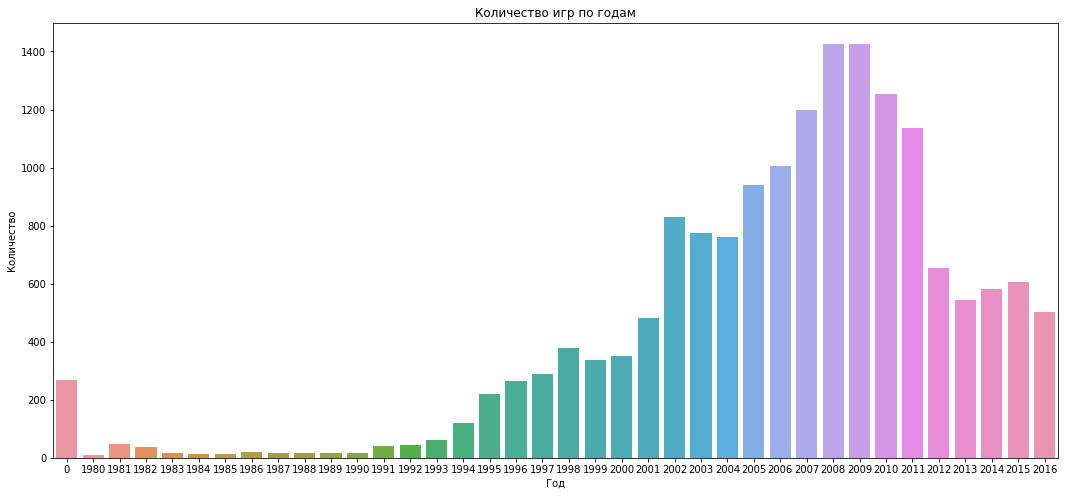

In [20]:
plt.figure(figsize=(18, 8))
sns.countplot(x = games.year_of_release).set(title = 'Количество игр по годам', xlabel = 'Год', ylabel = 'Количество') ;

Из графика видно, что значительный рост числа выпущенных игр произошел в 2002 году. Пиковыми были 2008 и 2009 годы. После 2011 года наблюдается некоторый спад производства.

Определим, какие платформы имеют наибольшие суммарные продажи. Для этого построим сводную таблицу и отсортируем значения по убыванию.

In [21]:
platforms_grouped = (games
                .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
                .sort_values(by = 'total_sales', ascending = False))
platforms_grouped.reset_index().head(10)

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Больше всего выделяются шесть платформ. Для них посмотрим, как менялись продажи по годам. 

In [22]:
#создадим срез основной таблицы, в который войдут данные только по шести платформам
#затем создадим сводную таблицу, где посчитаем продажи каждой платформы в каждом году
#отсечем те данные, где год равен 0

top_platforms = games[games['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'])]
top_platforms_pivot = top_platforms.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', 
                                                aggfunc = 'sum').reset_index()
top_platforms_pivot = top_platforms_pivot[top_platforms_pivot['year_of_release'] != 0]
top_platforms_pivot.head(10)


,platform,year_of_release,total_sales
1,DS,1985,0.02
2,DS,2004,17.27
3,DS,2005,130.14
4,DS,2006,119.81
5,DS,2007,146.94
6,DS,2008,145.31
7,DS,2009,119.54
8,DS,2010,85.02
9,DS,2011,26.18
10,DS,2012,11.01


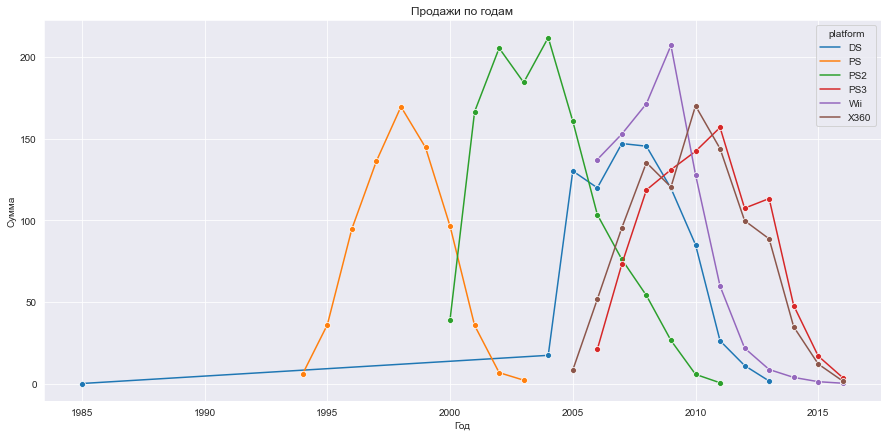

In [23]:
plt.figure(figsize=(15, 7))
sns.set_style('darkgrid')
sns.lineplot(data = top_platforms_pivot, x = 'year_of_release', y = 'total_sales', hue = 'platform', marker='o').set(
    title = 'Продажи по годам', xlabel = 'Год', ylabel = 'Сумма')
plt.show() ;

Как видно из графика, в среднем, продолжительность жизни одной платформы составляет около 10 лет. За актуальный период возьмем 2013-2016 годы и выясним, какие платформы лидируют по продажам в данный период.

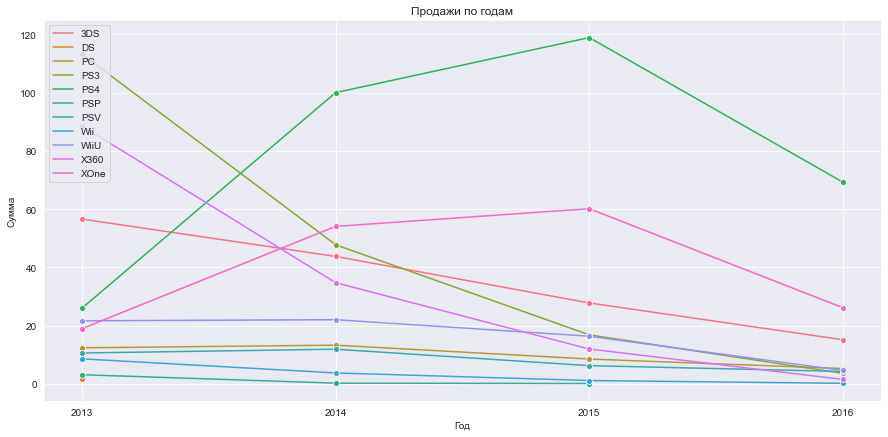

In [24]:
actual_data = games.query('year_of_release >= 2013').reset_index(drop=True)
actual_platforms = actual_data.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', 
                                           aggfunc = 'sum').reset_index()


plt.figure(figsize=(15, 7))
sns.set_style('darkgrid')
ax = sns.lineplot(data = actual_platforms, x = 'year_of_release', y = 'total_sales', hue = 'platform', marker='o')\
.set(title = 'Продажи по годам', xlabel = 'Год', ylabel = 'Сумма') 

plt.gca().set_xticks(actual_data['year_of_release'].unique())
plt.legend(loc="upper left")
plt.show();

В целом для рынка компьютерных игр в последние годы характерно сокращение объемов продаж. В начале исследуемого периода самыми крупными игроками были платформы PS3, X360 и 3DS. За последние пару лет лидерами стали платформы PS4 и XOne. 

Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам:

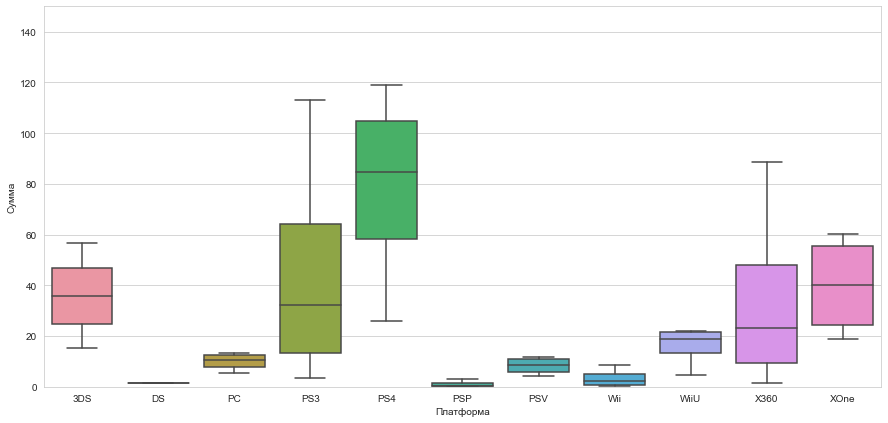

In [25]:
plt.figure(figsize=(15, 7))
sns.set_style('whitegrid')
sns.boxplot(x = 'platform', y = 'total_sales', data = actual_platforms).set(xlabel = 'Платформа', ylabel = 'Сумма') 
plt.ylim(0,150);

Оставим для рассмотрения только те две платформы, которые мы посчитали перспективными: PS4 и XOne.

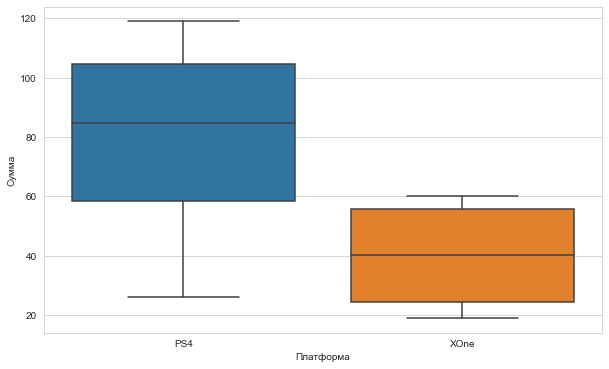

In [26]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.boxplot(x = 'platform', y = 'total_sales', data = actual_platforms.query('platform == ["PS4", "XOne"]'))\
.set(xlabel = 'Платформа', ylabel = 'Сумма') ;

Судя по диаграмме размаха, глобальные продажи платформы PS4 в два раза больше продаж платформы XOne. А средняя сумма продаж больше даже более, чем в два раза.

### Нахождение зависимости между продажами и отзывами

Для платформы PS4 посмотрим теперь, как влияют на продажи отзывы пользователей и критиков.

-0.03362497596528882

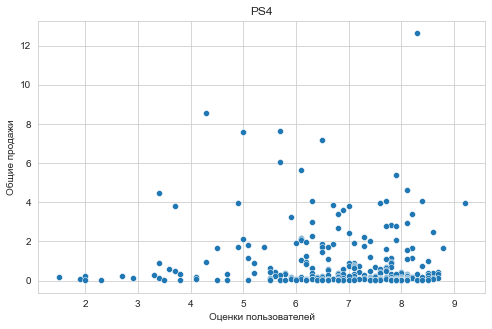

In [27]:
#делаем срез данных по одной платформе и отбрасываем значения-маркеры

ps4 = actual_data.query('platform == "PS4" and critic_score != 999 and user_score != 99.0')

plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.scatterplot(x = 'user_score', y = 'total_sales', data = ps4).set(title = 'PS4', xlabel = 'Оценки пользователей', 
         ylabel = 'Общие продажи') ;

ps4['total_sales'].corr(ps4['user_score'])   #находим корреляцию

Между оценками пользователей и продажами нет никакой зависимости. Игры, которые хорошо продаются, могут иметь как плохие, так и хорошие отзывы пользователей. То же самое и с играми, которые приносят мало денег.

0.4060021159350104

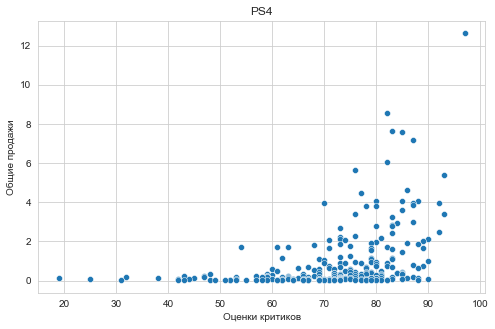

In [28]:
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.scatterplot(x = 'critic_score', y = 'total_sales', data = ps4).set(title = 'PS4', xlabel = 'Оценки критиков', 
         ylabel = 'Общие продажи') ;

ps4['total_sales'].corr(ps4['critic_score'])  #считаем корреляцию

Между оценками критиков и продажами есть небольшая положительная корреляция. То есть хорошие отзывы критиков нередко приводят к высоким продажам, но, как мы видим на графике, они их не гарантируют.

Чтобы соотнести выводы с продажами игр на других платформах, рассчитаем корреляцию между оценками и продажами для самых крупных из них: PS3, X360, XOne и 3DS.

In [29]:
ps3 = actual_data.query('platform != "PS3" and critic_score != 999 and user_score != 99.0')

print(ps3['total_sales'].corr(ps3['user_score'])) 
print(ps3['total_sales'].corr(ps3['critic_score'])) 

-0.009335375139652307
0.31833237992142577


In [30]:
x360 = actual_data.query('platform != "X360" and critic_score != 999 and user_score != 99.0')

print(x360['total_sales'].corr(x360['user_score'])) 
print(x360['total_sales'].corr(x360['critic_score'])) 

0.0028760187191345364
0.31519796996672356


In [31]:
xboxone = actual_data.query('platform != "XOne" and critic_score != 999 and user_score != 99.0')

print(xboxone['total_sales'].corr(xboxone['user_score'])) 
print(xboxone['total_sales'].corr(xboxone['critic_score'])) 

0.007944807024648661
0.3016990220367024


In [32]:
threeds = actual_data.query('platform != "3DS" and critic_score != 999 and user_score != 99.0')

print(threeds['total_sales'].corr(threeds['user_score'])) 
print(threeds['total_sales'].corr(threeds['critic_score'])) 

-0.012865152253784394
0.3119152710879808


Показатели везде очень похожие. Взаимосвязь между отзывами пользователей и продажами отсутствует. А с оценками критиков прослеживается небольшая положительная корреляция.

### Определение самых прибыльных жанров

Также посмотрим, как зависит прибыль от жанра игры. 

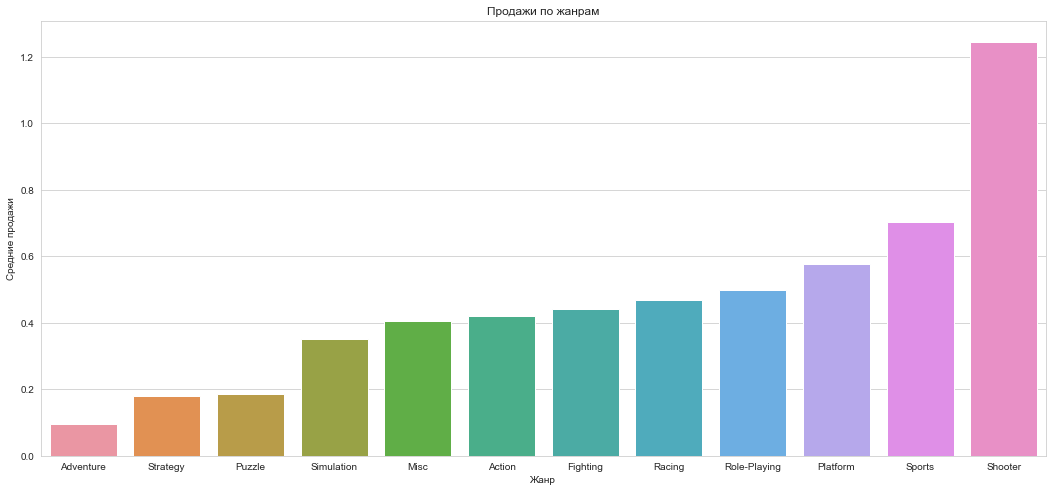

In [33]:
top_genre = (actual_data
                 .pivot_table(index = 'genre', values = 'total_sales')
                 .reset_index()
                 .sort_values(by='total_sales')
            )

plt.figure(figsize=(18, 8))
sns.barplot(x = 'genre', y = 'total_sales', data = top_genre).set(title = 'Продажи по жанрам', 
                                                                  xlabel = 'Жанр', ylabel = 'Средние продажи') ;

Самым прибыльным жанром с большим отрывом является "шутер", на втором месте - "платформер". Меньше всего денег приносят игры приключенческого характера (квесты).

## Портрет пользователя каждого региона

Для того, чтобы определить портрет пользователя каждого региона, напишем функцию, которая будет принимать на вход необходимый показатель и данные отдельного региона и строить сводную таблицу:

In [34]:
def region_top(column, region_sales):
    return actual_data.pivot_table(index = column, values = region_sales, aggfunc = 'sum').sort_values(by = region_sales, 
                                                                                                ascending=False).head()

И определим еще одну функцию, которая на основе сводной таблицы построит круговую диаграмму: 

In [35]:
def region_pie(df, region_sales, title):
    df.plot.pie(y = region_sales, autopct="%.1f%%", title = title, figsize=(7, 7))
    plt.show()

### Самые популярные платформы

Вызываем обе функции, чтобы посмотреть на самые популярные платформы в Северной Америке.

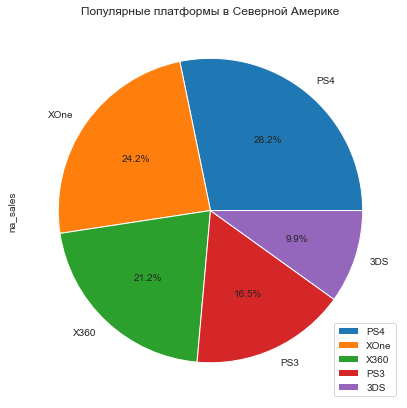

In [36]:
region_pie(region_top('platform', 'na_sales'), 'na_sales', 'Популярные платформы в Северной Америке')

Лидирует приставка PS4. На втором и третьем месте - XOne и X360 американской компании Microsoft. 

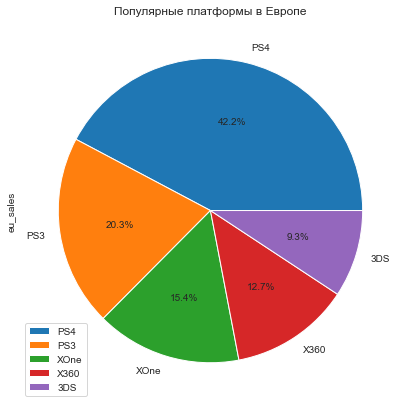

In [37]:
region_pie(region_top('platform', 'eu_sales'), 'eu_sales', 'Популярные платформы в Европе')

В Европе самой популярной платформой тоже является PS4 (Playstation), следует за ней PS3. В целом топ-5 совпадает.

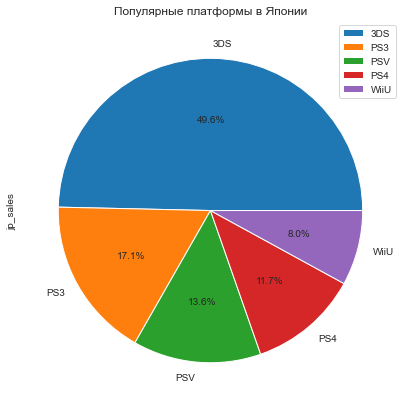

In [38]:
region_pie(region_top('platform', 'jp_sales'), 'jp_sales', 'Популярные платформы в Японии')

В Японии самой популярной платформой с большим отрывом является 3DS от отечественной Nintendo.

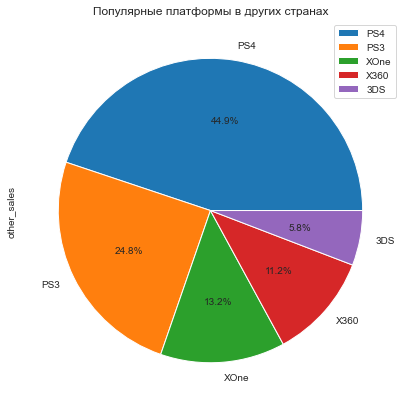

In [39]:
region_pie(region_top('platform', 'other_sales'), 'other_sales', 'Популярные платформы в других странах')

Картина в остальном мире схожа с Европой - первое место по популярности занимает PS4, второе место у PS3.  

**Вывод:** Во всем мире, кроме Японии, лидерами на рынке являются платформы Playstation и Microsoft. Пользователи в Северной Америке и Японии отдают предпочтение консолям "своих" брендов.

### Самые популярные жанры

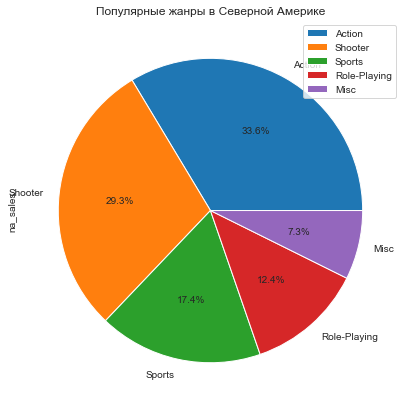

In [40]:
region_pie(region_top('genre', 'na_sales'), 'na_sales', 'Популярные жанры в Северной Америке')

В Северной Америке самым популярным жанром является "экшен". После него идет "шутер".

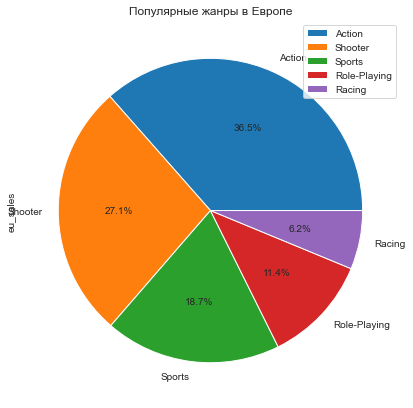

In [41]:
region_pie(region_top('genre', 'eu_sales'), 'eu_sales', 'Популярные жанры в Европе')

Среднестатистические игроки в Северной Америке и Европе очень похожи - "экшен" и "шутер" популярнее всего.

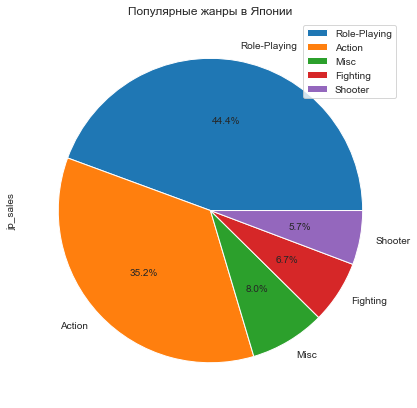

In [42]:
region_pie(region_top('genre', 'jp_sales'), 'jp_sales', 'Популярные жанры в Японии')

Игроки в Японии с большим отрывом предпочитают ролевые игры. На втором месте - "экшен". А вот "шутер" только на пятом месте. 

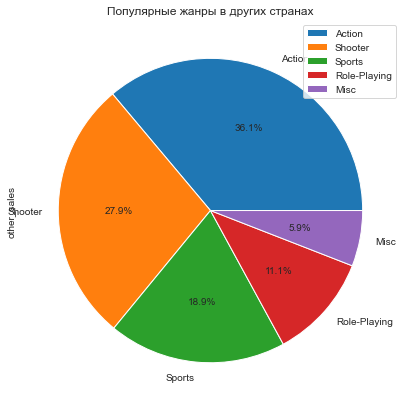

In [43]:
region_pie(region_top('genre', 'other_sales'), 'other_sales', 'Популярные жанры в других странах')

В других странах лидируют все так же игры в жанре "экшен" и "стрелялки".

**Вывод:** Игроки в Японии сильно отличаются от игроков в других странах. Если во всем мире преобладает жанр "экшен", то в Японии - это ролевые игры.

### Влияние рейтинга на продажи

Прежде чем выяснять игры с каким рейтингом имеют наибольшие продажи в каждом регионе, найдем расшифровку буквенных обозначений рейтинга.

In [44]:
games['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Итак, согласно рейтингу ESRB:

- **EC** («Early childhood») — «Для детей младшего возраста»
- **E** («Everyone») — «Для всех»
- **E10+** («Everyone 10 and older») — «Для всех от 10 лет и старше»
- **T** («Teen») — «Подросткам» (от 13 лет)
- **M** («Mature») — «Для взрослых» (от 17 лет)
- **AO** («Adults Only 18+») — «Только для взрослых»
- **RP** («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга

**K-A** («Kids to Adults») - рейтинг применялся до 1998 года, пока не был заменен на **E**. Так как мы исследуем только срез данных с 2006 года, он не должен нам встретиться.


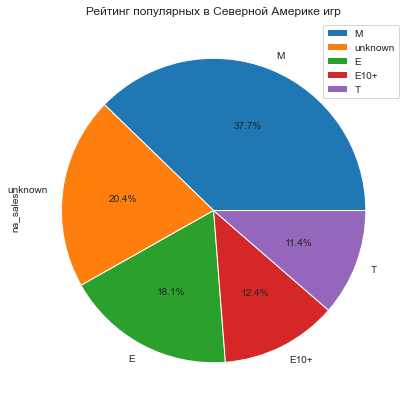

In [45]:
region_pie(region_top('rating', 'na_sales'), 'na_sales', 'Рейтинг популярных в Северной Америке игр')

Бо́​льшая доля игр имеет рейтинг "для всех" и "для взрослых".

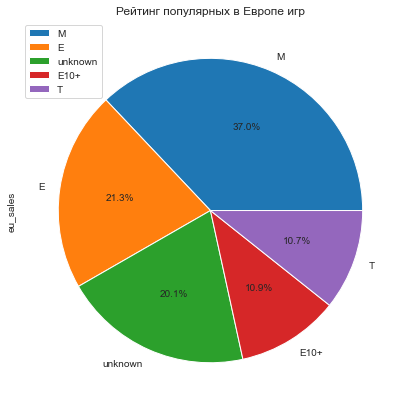

In [46]:
region_pie(region_top('rating', 'eu_sales'), 'eu_sales', 'Рейтинг популярных в Европе игр')

В Европе собственно такая же картина - популярны игры с рейтингами M и E.

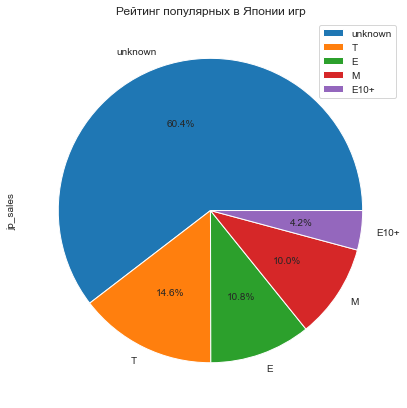

In [47]:
region_pie(region_top('rating', 'jp_sales'), 'jp_sales', 'Рейтинг популярных в Японии игр')

Здесь мы видим, что большое количество игр не имеет рейтинг. Вероятно, в Японии особенно популярны отечественные игры, а им либо не присуждался рейтинг ESRB, либо у нас просто отсутствует эта информация. Но следующие по популярности игры имеют рейтинг T и E. 

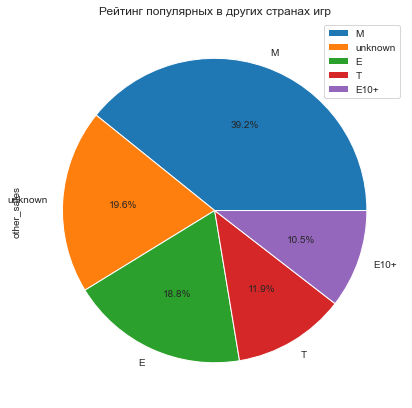

In [48]:
region_pie(region_top('rating', 'other_sales'), 'other_sales', 'Рейтинг популярных в других странах игр')

В остальных странах ситуация ничем не отличается от Европы и Северной Америки. Самые продаваемые игры имеют рейтинг M и E. На третьем месте - игры для подростков.

**Вывод:** во всех четырех регионах 5 самых популярных рейтингов совпадают. Есть небольшое отличие в Японии - там более распространены игры для подростков, чем для взрослых. В целом вряд ли можно говорить о наличии какой-либо зависимости между рейтингом игры и ее продажами. Вероятно, что просто большинство всех выпускаемых игр имеют рейтинг E, M, T и E10+. Рейтинги EC и AO являются двумя крайностями, аудитория таких игр сильно ограничена, мало кому они будут присуждаться. Что касается RP, такой рейтинг применяется только до официальной даты выпуска игры в продажу, поэтому в нашей таблице таких случаев будут единицы.

In [49]:
actual_data['rating'].value_counts()

unknown    977
M          369
T          333
E          302
E10+       252
Name: rating, dtype: int64

## Проверка гипотез

### Гипотеза о средних пользовательских рейтингах платформ Xbox One и PC

Сформулируем нулевую гипотезу (H₀) — средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза (H₁) — средние пользовательские рейтинги платформ Xbox One и PC различаются.

Сначала создадим две выборки.

In [50]:
xone = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] != 99.0)]
pc = actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'] != 99.0)]

Для проверки гипотез сравниваем среднее двух генеральных совокупностей методом `scipy.stats.ttest_ind (array1, array2, equal_var)`. Критический уровень статистической значимости зададим 1%.

In [51]:
alpha = 0.01

results = st.ttest_ind(xone['user_score'], pc['user_score'], nan_policy='omit')  #не забываем, что в столбце есть Nan-ы, 
                                                                                 #используем 'omit', чтобы игнорировать их  
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611503
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value больше порогового значения alpha. Значит, средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

In [52]:
print("Средний пользовательский рейтинг платформы Xbox One:", xone['user_score'].mean())
print("Средний пользовательский рейтинг платформы PC:", pc['user_score'].mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC: 6.269677419354839


 ### Гипотеза о средних пользовательских рейтингах жанров Action и Sports

Сформулируем нулевую гипотезу (H₀) — средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза (H₁) — средние пользовательские рейтинги жанров Action и Sports различаются.

Создаем два среза данных.

In [53]:
action = actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'] != 99.0)]
sports = actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] != 99.0)]

Для проверки гипотез сравниваем среднее двух генеральных совокупностей методом `scipy.stats.ttest_ind (array1, array2, equal_var)`. Критический уровень статистической значимости зададим 1%.

In [54]:
alpha = 0.01

results = st.ttest_ind(action['user_score'], sports['user_score'], nan_policy='omit')   
                                                                                   
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389139422e-27
Отвергаем нулевую гипотезу


P-value сильно меньше порогового значения alpha, т.е. с практически нулевой вероятностью мы можем получить случайное равенство значений. Гипотеза H₀ отвергается. Значит, средние пользовательские рейтинги жанров Action и Sports различаются.

In [55]:
print("Средний пользовательский рейтинг жанра Action:", action['user_score'].mean())
print("Средний пользовательский рейтинг жанра Sports:", sports['user_score'].mean())

Средний пользовательский рейтинг жанра Action: 6.837532133676093
Средний пользовательский рейтинг жанра Sports: 5.238124999999999


**Вывод:** Мы проверили две гипотезы:

1) средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 2) средние пользовательские рейтинги жанров Action и Sports разные.

И установили, что данные не противоречат обеим гипотезам.

## Вывод

В результате исследования мы установили, что массовое производство игр началось примерно в 1994 году и достигло максимума в 2008 и 2009 годах, после чего пошло на спад. Лидеры на рынке игровых платформ постоянно меняются, в среднем, одна платформа "живет" 10 лет. Последние пару лет на рынке доминируют приставки PS4 и XOne.
Самым прибыльным жанром является "шутер", на втором месте - спортивные игры. Меньше всего денег приносят игры приключенческого характера (квесты). Самыми популярными являются игры с рейтингом M или E. Оценки пользователей и критиков не имеют сильного влияния на продажи игр.

У игроков из разных регионов есть свои предпочтения. Так, например, японцы больше предпочитают Role-Playing игры и платформу компании Nintendo, тогда как жители других регионов выбирают жанр Action и приставку от Playstation.

На основе вышесказанного, для успешной работы магазину "Стримчик" стоит:

- делать упор на продажи игр жанров Action, Shooter и Sports; 
- ориентироваться на продажи игр с рейтингом E ("для всех"), M ("для взрослых") или T ("для подростков"); 
- сосредоточиться на реализации игр для платформ брендов Playstation и Microsoft; 
- если среди покупателей магазина большую долю составляют игроки из Японии, то иметь возможность удовлетворить спрос на игры жанра Role-Playing и игры для приставок Nintendo;
- не забывать, что в среднем жизненный цикл отдельно взятой платформы составляет около 10 лет.   